鈴木讓「統計的機械学習の数理 with Python 100問」(共立出版)

# 第５章 正則化

## 5.1 Ridge

In [1]:
! pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import japanize_matplotlib
import scipy
from scipy import stats
from numpy.random import randn
import copy

In [3]:
# Anacondaの場合は下記( import japanize_matplotlib はコメントアウト)
import matplotlib
from matplotlib import font_manager
matplotlib.rc("font", family="BIZ UDGothic")

In [4]:
def ridge_regression(x, y, lam=0):
    X = copy.copy(x)
    n, p = X.shape
    X_bar = np.zeros(p)
    s = np.zeros(p)
    for j in range(p):
        X_bar[j] = np.mean(X[:, j])
    for j in range(p):
        s[j] = np.std(X[:, j], ddof=1)  # 標準偏差は不偏推定量を使用
        X[:, j] = (X[:, j] - X_bar[j]) / s[j]
    y_bar = np.mean(y)
    y_adjusted = y - y_bar
    beta = np.linalg.inv(X.T @ X + n * lam * np.eye(p)) @ X.T @ y_adjusted
    for j in range(p):
        beta[j] = beta[j] / s[j]
    beta_0 = y_bar - np.dot(X_bar, beta)
    return {'beta': beta, 'beta_0': beta_0}

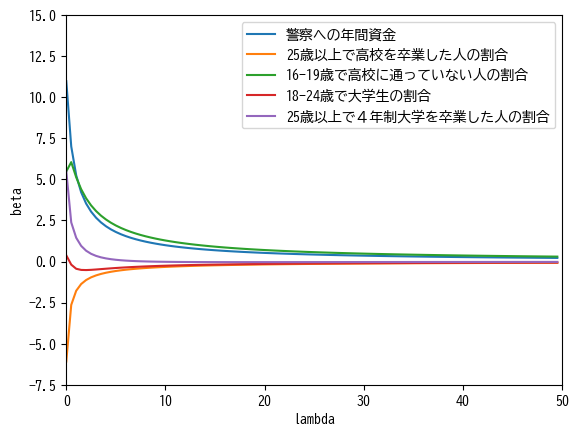

In [5]:
df = np.loadtxt("crime.txt", delimiter="\t")
X = df[:, [i for i in range(2, 7)]]
p = X.shape[1]
y = df[:, 0]

lambda_seq = np.arange(0, 50, 0.5)
plt.xlim(0, 50)
plt.ylim(-7.5, 15)
plt.xlabel("lambda")
plt.ylabel("beta")
labels = ["警察への年間資金", "25歳以上で高校を卒業した人の割合", "16-19歳で高校に通っていない人の割合",
          "18-24歳で大学生の割合", "25歳以上で４年制大学を卒業した人の割合"]
for j in range(p):
    coef_seq = []
    for l in lambda_seq:
        coef_seq.append(ridge_regression(X, y, l)['beta'][j])
    plt.plot(lambda_seq, coef_seq, label="{}".format(labels[j]))
plt.legend(loc="upper right")
plt.show()

## 5.2 劣微分

Text(0.5, 1.0, 'y = x^2 - 3x + |x|')

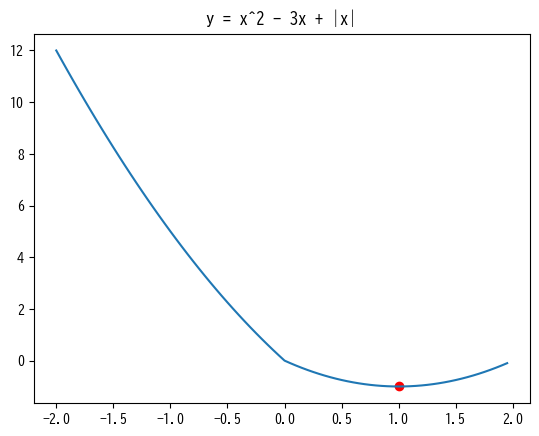

In [6]:
x_seq = np.arange(-2, 2, 0.05)
y = x_seq**2 - 3 * x_seq + np.abs(x_seq)

plt.plot(x_seq, y)
plt.scatter(1, -1, c="red")
plt.title("y = x^2 - 3x + |x|")

Text(0.5, 1.0, 'y = x^2 + x + 2|x|')

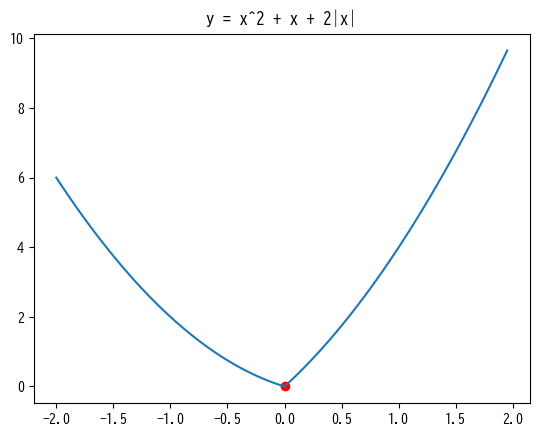

In [7]:
plt.figure()
y = x_seq**2 + x_seq + 2 * np.abs(x_seq)
plt.plot(x_seq, y)
plt.scatter(0, 0, c="red")
plt.title("y = x^2 + x + 2|x|")

図5.4

## 5.3 Lasso

In [8]:
def soft_threshold(lam, x):
    """Soft thresholding function."""
    return np.sign(x) * np.maximum(np.abs(x) - lam, 0)

Text(-1.5, 1, 'λ=5')

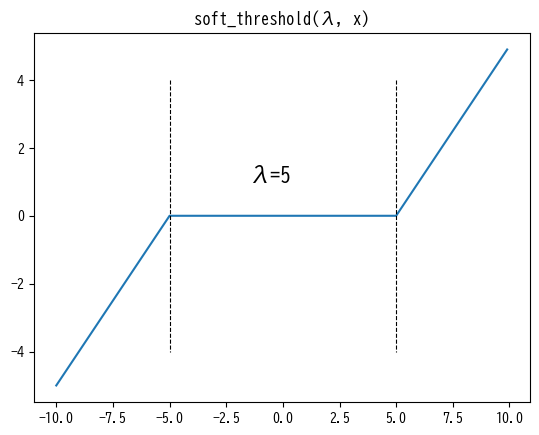

In [9]:
x_seq = np.arange(-10, 10, 0.1)

plt.plot(x_seq, soft_threshold(5, x_seq))
plt.plot([-5, -5], [4, -4], c="black", linestyle="dashed", linewidth=0.8)
plt.plot([5, 5], [4, -4], c="black", linestyle="dashed", linewidth=0.8)
plt.title("soft_threshold(λ, x)")
plt.text(-1.5, 1, 'λ=5', fontsize=15)


In [10]:
def lasso(x, y, lam=0):  # lamはlambdaの略
    X = copy.copy(x)
    n, p = X.shape
    X_bar = np.zeros(p)
    s = np.zeros(p)
    for j in range(p):
        X_bar[j] = np.mean(X[:, j])
        s[j] = np.std(X[:, j])
        X[:, j] = (X[:, j] - X_bar[j]) / s[j]
    y_bar = np.mean(y)
    y = y - y_bar
    eps = 1
    beta = np.zeros(p)
    beta_old = np.zeros(p)
    while eps > 0.001:
        for j in range(p):
            index = list(set(range(p)) - {j})
            r = y - X[:, index] @ beta[index]
            beta[j] = soft_threshold(lam, r.T @ X[:, j] / n)
        eps = np.max(np.abs(beta - beta_old))
        beta_old = copy.copy(beta)
    for j in range(p):
        beta[j] = beta[j] / s[j]
    beta_0 = y_bar - X_bar.T @ beta
    return {'beta': beta, 'beta_0': beta_0}

In [11]:
# データを読み込む
df = np.loadtxt("crime.txt", delimiter="\t")
# 特徴量として2番目から6番目のカラムを選択
X = df[:, [i for i in range(2, 7)]]
# 形状から特徴量の数を取得
p = X.shape[1]
# 目的変数として最初のカラムを選択
y = df[:, 0]

# lasso 関数を適用
result = lasso(X, y, 20)

# 結果の表示
print("Optimized coefficients (beta):", result['beta'])
print("Intercept (beta_0):", result['beta_0'])

Optimized coefficients (beta): [ 9.65900353 -2.52973842  3.23224466  0.          0.        ]
Intercept (beta_0): 452.2080778769339


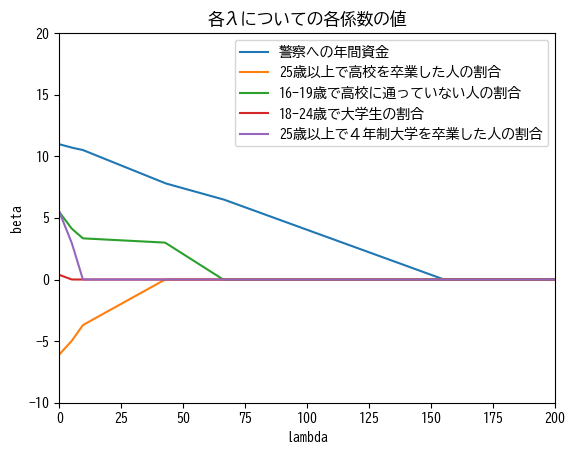

In [12]:
# lambdaのシーケンスを定義
lambda_seq = np.arange(0, 200, 0.5)

# プロットの設定
plt.xlim(0, 200)
plt.ylim(-10, 20)
plt.xlabel("lambda")
plt.ylabel("beta")

# 凡例に表示するラベル
labels = ["警察への年間資金", "25歳以上で高校を卒業した人の割合", "16-19歳で高校に通っていない人の割合", "18-24歳で大学生の割合", "25歳以上で４年制大学を卒業した人の割合"]

# 各特徴量に対して、異なるlambda値での係数を計算
for j in range(p):
    coef_seq = []
    for l in lambda_seq:
        coef_seq.append(lasso(X, y, l)['beta'][j])
    plt.plot(lambda_seq, coef_seq, label="{}".format(labels[j]))

# 凡例とタイトルをプロットに追加
plt.legend(loc="upper right")
plt.title("各λについての各係数の値")

# プロットの表示
plt.show()

In [13]:
lasso(X, y, 20)

{'beta': array([ 9.65900353, -2.52973842,  3.23224466,  0.        ,  0.        ]),
 'beta_0': 452.2080778769339}

## 5.4 RidgeとLassoを比較して

## 5.5 λの値の設定

In [14]:
from sklearn.linear_model import Lasso, LassoCV

In [15]:
# 単一のalpha値を使用したLasso回帰
Las = Lasso(alpha=20)
Las.fit(X, y)
Las.coef_

array([11.09067594, -5.2800757 ,  4.65494282,  0.55015932,  2.84324295])

In [16]:
# クロスバリデーションを用いたalphaの自動選択
Lcv = LassoCV(alphas=np.arange(0.1, 30, 0.1), cv=10)
Lcv.fit(X, y)

# 最適なalpha値、係数、切片の出力
print(Lcv.alpha_)
print(Lcv.coef_)
print(Lcv.intercept_)

29.900000000000002
[11.14516156 -4.87861992  4.24780979  0.63662582  1.52576885]
478.4440424650896
